# Contributors List

List only the BITS (Name) of active contributors in this assignment:

1. MAHENDRAPRABHU R (2023AD05067) - 100%
2. ASWIN BALAJI R (2023ad05054)- 100%
3. SUBHASH SADACHARAM (2023ac05964)- 100%
4. REVATHI P (2023ad05044)- 100%

# Case Study : Churn rate

The customer churn dataset contains information about customers in a telecommunications company. The aim is to predict whether a customer will churn (stop using the service). The dataset includes various customer demographics, account information, and service usage patterns. We would take the following approach to finish this modelling using the suggested models Logistic Regression & Decision Tree -

1. Use Case Summary
2. Data Visualisation and Exploration
3. Data Preprocessing and Cleaning
4. Model Building and Selection
5. Performance Evaluation

# 1. Use Case Summary

Problem Statement

Predicting customer churn is a critical task for telecommunications companies aiming to retain
their customers and reduce revenue loss. Customer churn refers to the phenomenon where
customers discontinue using the company's services. By accurately predicting which customers
are likely to churn, the company can take proactive measures to improve customer satisfaction
and retention.
For this assignment, you are provided with a dataset containing various features related to
customer demographics, account information, and service usage patterns. The dataset also
includes random missing values to simulate real-world data issues.
The objective is to build a machine learning classification model to predict whether a customer
will churn (i.e., stop using the company's services). You will need to preprocess the data, handle
missing values, perform feature engineering, build and evaluate classification models, and
provide insights based on the model's performance.
Dataset: customer_churn_dataset.csv (uploaded as separate file)
Meta Data: metadatafile_customerchurndata.txt (uploaded as separate file)

1. Import Libraries/Dataset

    a. Download the dataset.
    b. Import the required libraries.

2. Data Visualization and Exploration

    a. Print 2 rows for sanity check to identify all the features present in the dataset and if
    the target matches with them.
    b. Provide appropriate data visualizations to get an insight about the dataset.
    c. Do the correlational analysis on the dataset. Provide a visualization for the same.
    Will this correlational analysis have effect on feature selection that you will perform
    in the next step? Justify your answer. Answer without justification will not be
    awarded marks.

3. Data Pre-processing and cleaning

    a. Do the appropriate pre-processing of the data like identifying NULL or Missing
    Values if any, handling of outliers if present in the dataset, skewed data etc. Mention
    the pre-processing steps performed in the markdown cell.
    b. Apply appropriate feature engineering techniques. Apply the feature transformation
    techniques like Standardization, Normalization, etc. You are free to apply the
    appropriate transformations depending upon the structure and the complexity of
    your dataset. Provide proper justification. Techniques used without justification
    will not be awarded marks. Explore a few techniques for identifying feature
    importance for your feature engineering task.

4. Model Building

    a. Split the dataset into training and test sets. Answer without justification will not
    be awarded marks.
        i. Train = 80 % Test = 20%
        ii. Also, try to split the dataset with different ratios of your choice.
    b. Build model using Logistic model and decision tree [4 M]
        i. Tune hyperparameters (e.g., number of trees, maximum depth) using cross-
        validation. Justify your answer.

5. Performance Evaluation

    a. Compare the performance of the Logistic Regression and Decision Tree models
    using appropriate evaluation metrics.
    b. Provide insights into which model performs better and why. Answer without
    justification will not be awarded marks.

# 2 Required Package Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import zscore




FileNotFoundError: [Errno 2] No such file or directory: 'customer_churn_dataset.csv'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
dataset=pd.read_csv("/content/drive/MyDrive/Python/customer_churn_dataset.csv")
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.0,Yes,No,NaN,No,No internet service,1
1,Cust_2,Female,1.0,No,No,NaN,Yes,No,Fiber optic,Yes,Yes,0
2,Cust_3,Male,0.0,NaN,Yes,NaN,NaN,Yes,NaN,No,NaN,0
3,Cust_4,Male,1.0,No,No,13.0,Yes,No phone service,NaN,No,NaN,0
4,Cust_5,NaN,1.0,Yes,Yes,55.0,No,No,NaN,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Cust_9996,Female,0.0,No,No,NaN,No,No phone service,Fiber optic,No internet service,No internet service,1
9996,Cust_9997,Male,0.0,No,No,NaN,No,NaN,NaN,Yes,Yes,1
9997,Cust_9998,Female,0.0,No,Yes,7.0,No,Yes,Fiber optic,No,NaN,0
9998,Cust_9999,Female,NaN,No,No,12.0,No,NaN,Fiber optic,Yes,No,1


### 2.1 Reading data from Churn Datasets

In [10]:
print(dataset.shape)
print(dataset.describe())
print(dataset.head(2))

print(dataset.columns)

print("Unique Values of the Columns\n")
#######################################
print("gender unique: ", dataset['gender'].unique())
print("tenure unique: ", dataset['tenure'].unique())
print("SeniorCitizen unique: ", dataset['SeniorCitizen'].unique())
print("PhoneService unique: ", dataset['PhoneService'].unique())
print("Partner unique: ", dataset['Partner'].unique())
print("OnlineSecurity unique: ", dataset['OnlineSecurity'].unique())
print("OnlineBackup unique: ", dataset['OnlineBackup'].unique())
print("MultipleLines unique: ", dataset['MultipleLines'].unique())
print("InternetService unique: ", dataset['InternetService'].unique())
print("Dependents unique: ", dataset['Dependents'].unique())
print("Churn unique: ", dataset['Churn'].unique())

(10000, 12)
       SeniorCitizen       tenure         Churn
count    9000.000000  9000.000000  10000.000000
mean        0.500111    36.459889      0.502000
std         0.500028    20.691516      0.500021
min         0.000000     1.000000      0.000000
25%         0.000000    19.000000      0.000000
50%         1.000000    37.000000      1.000000
75%         1.000000    54.000000      1.000000
max         1.000000    72.000000      1.000000
  customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Cust_1    Male            0.0     Yes         No     2.0          Yes   
1     Cust_2  Female            1.0      No         No     NaN          Yes   

  MultipleLines InternetService OnlineSecurity         OnlineBackup  Churn  
0            No             NaN             No  No internet service      1  
1            No     Fiber optic            Yes                  Yes      0  
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure

There are 3 numerical values in the given dataset before preprocessing;

1. Churn is a Label data with binary class

2. Senior Citizen is an independant feature with binary class

3. tenure is an independant feature with values ranging from 1 to 72 months;

# Stage 2 - Data Visualizations

2.1 Seaborn plots for visualising the data

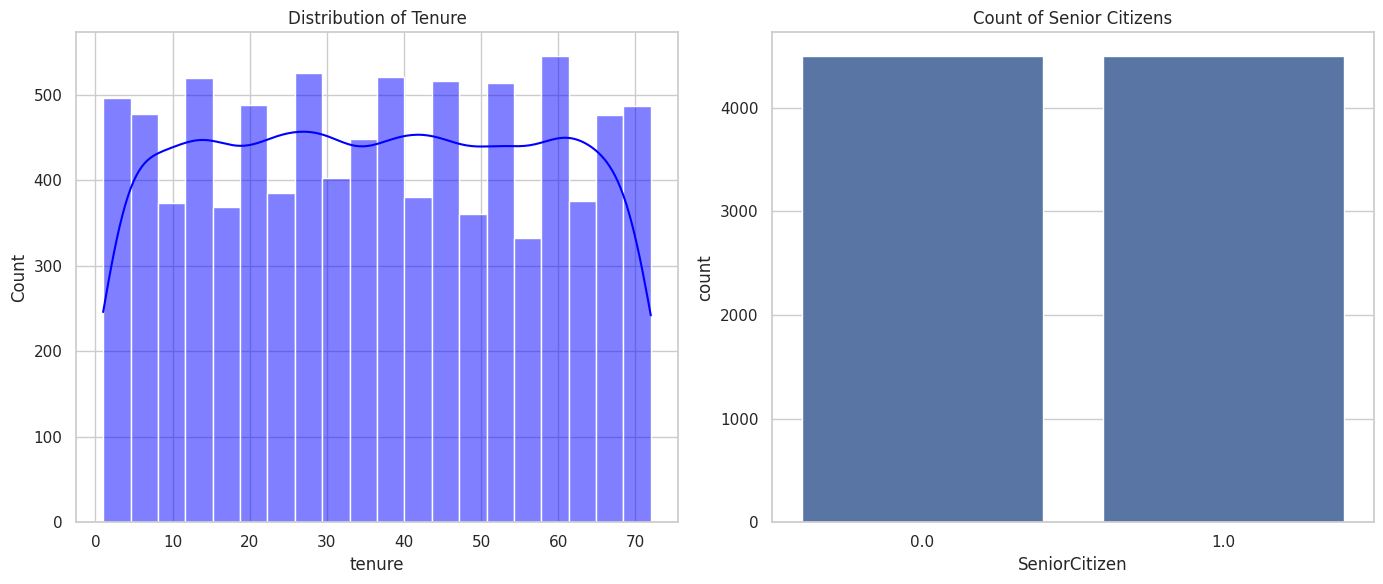

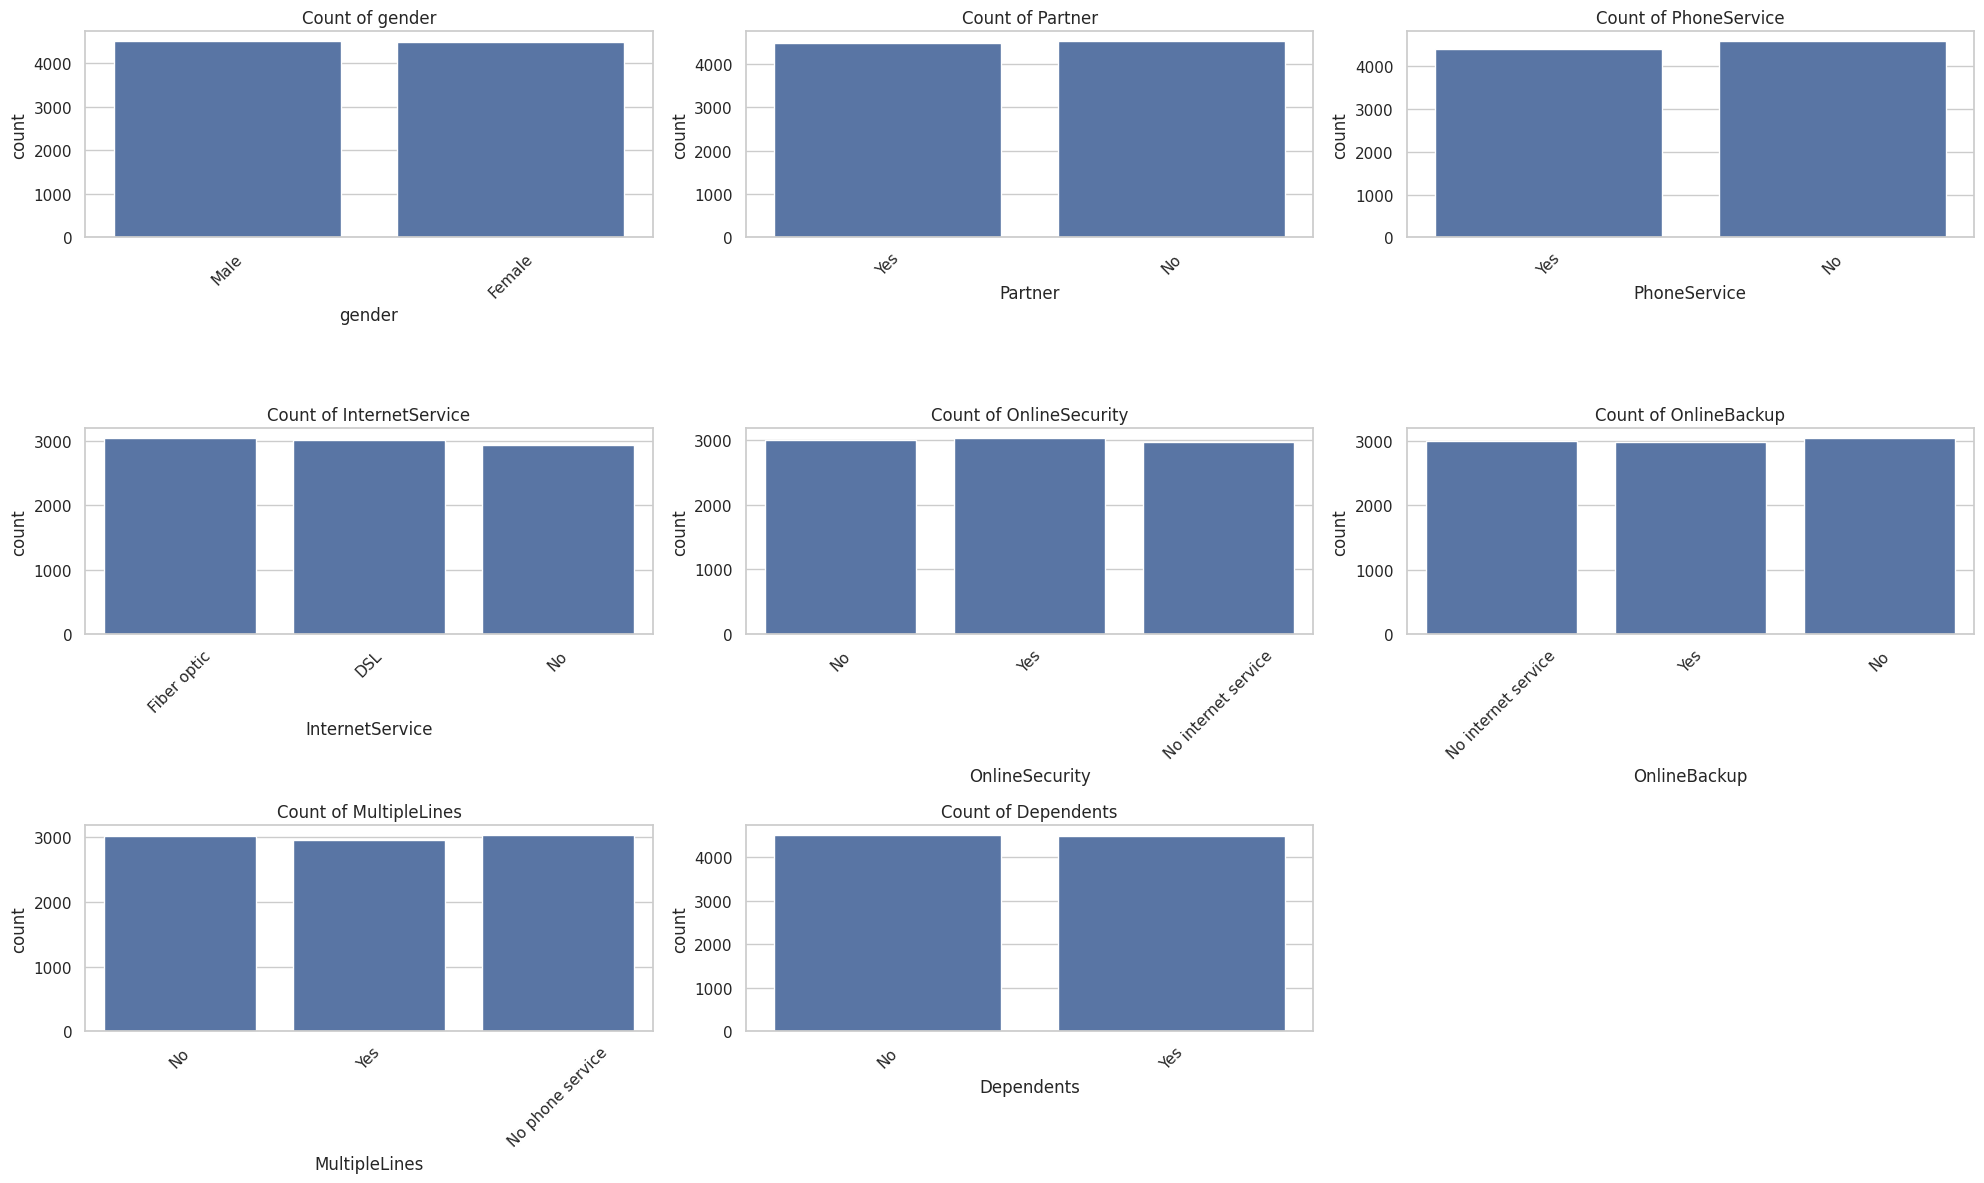

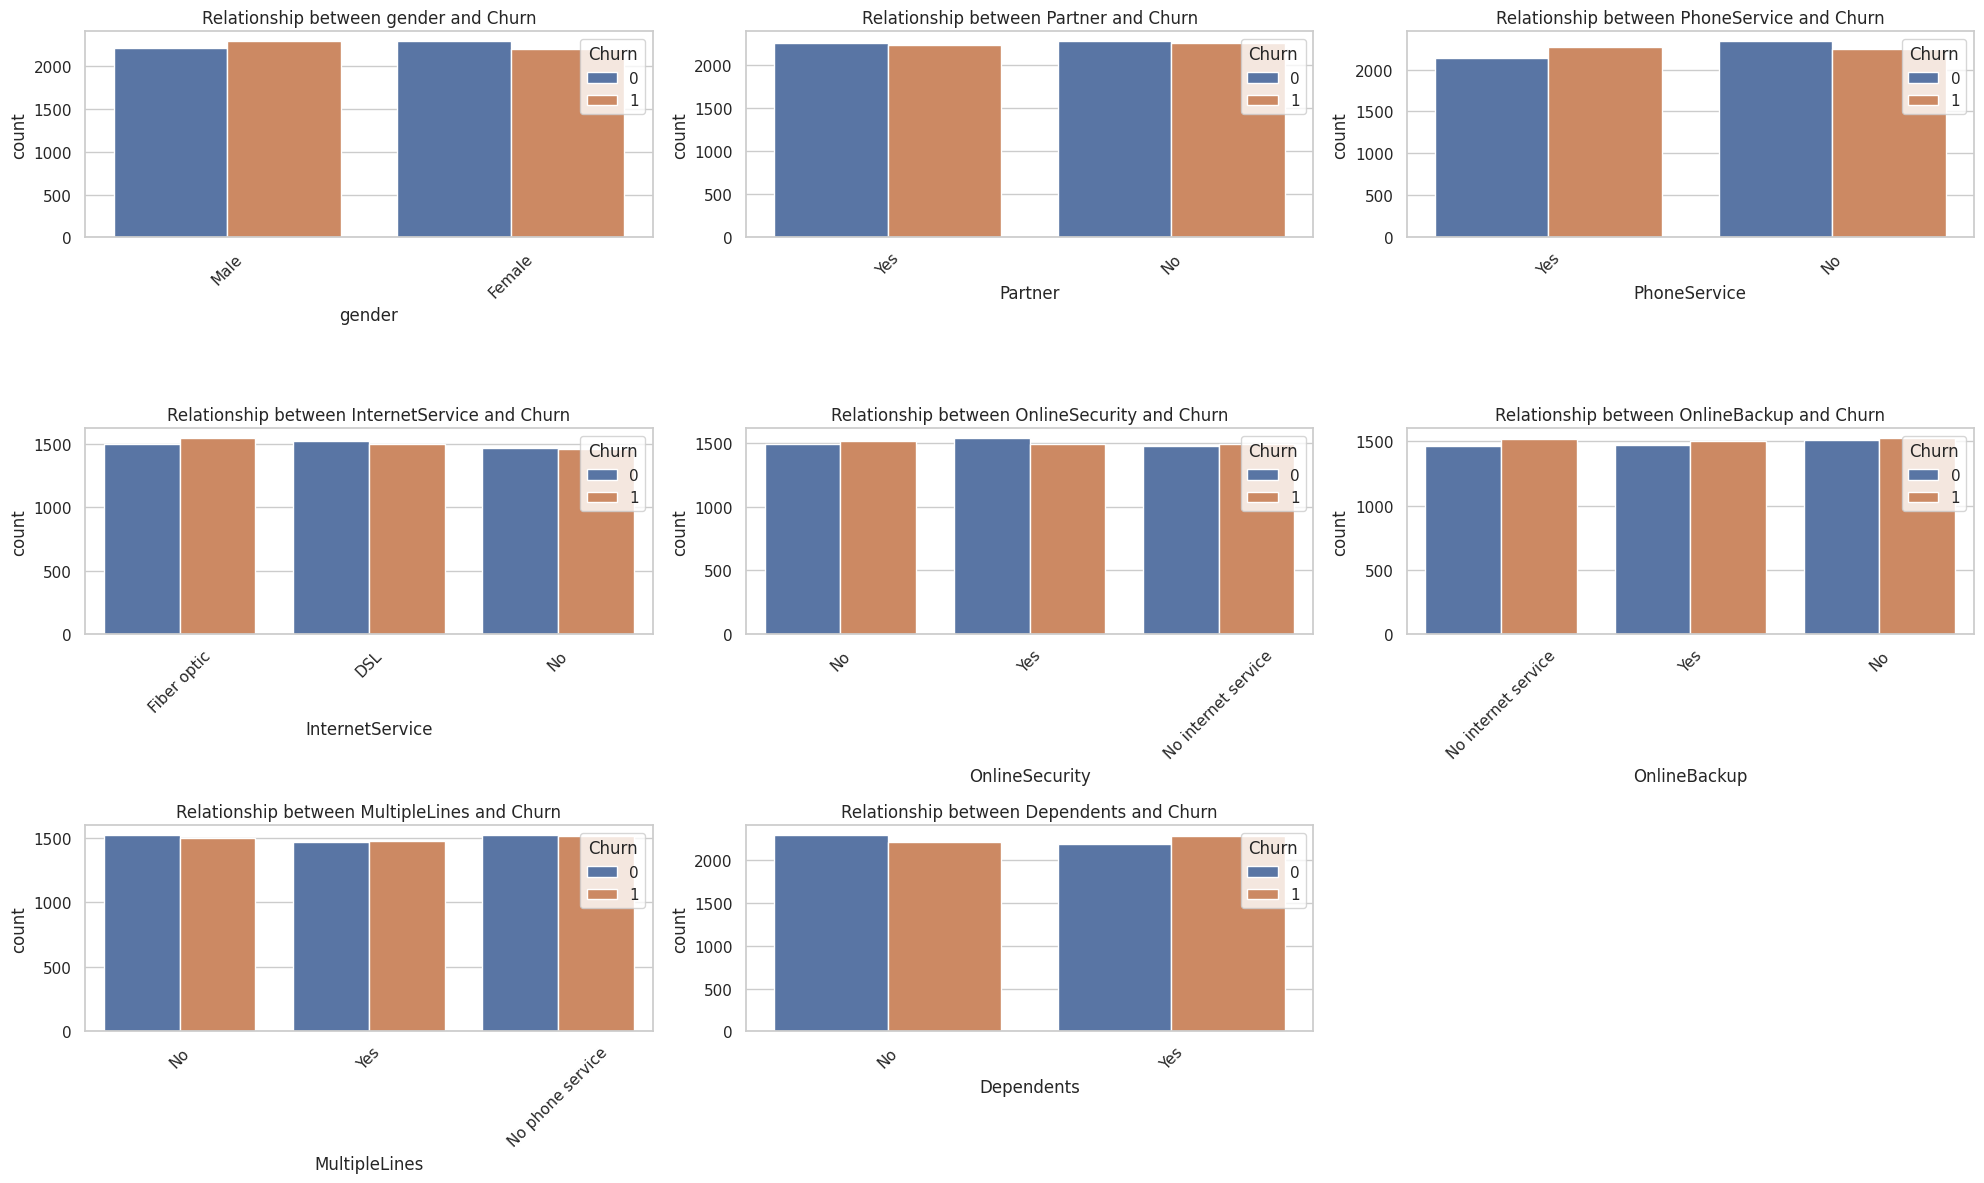

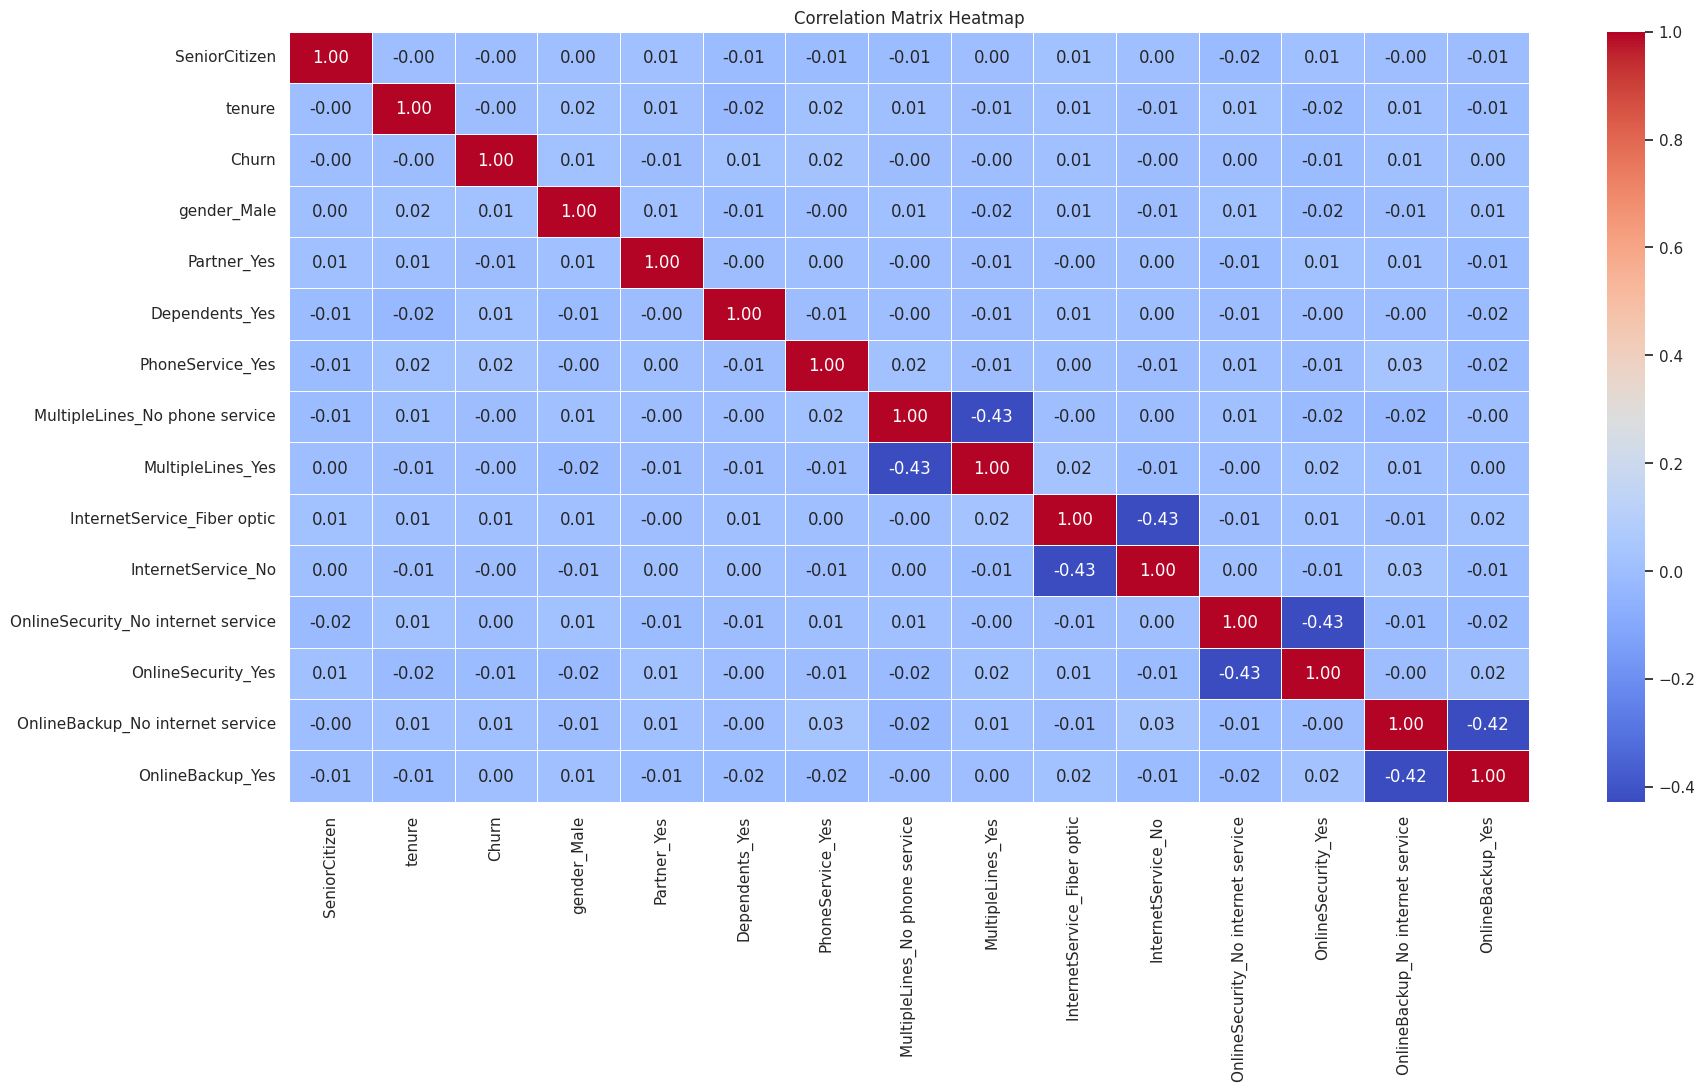

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'Churn'],
      dtype='object')


In [11]:
# Drop the customerID column as it is not needed for visualization
if 'customerID' in dataset.columns:
    dataset = dataset.drop(columns=['customerID'])

# Set the style for the plots
sns.set(style="whitegrid")

# a. Distribution of Numerical Features: `tenure` and `SeniorCitizen`
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(dataset['tenure'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Tenure')

plt.subplot(1, 2, 2)
sns.countplot(x='SeniorCitizen', data=dataset)
plt.title('Count of Senior Citizens')

plt.tight_layout()
plt.show()

# b. Count Plots for Categorical Features
categorical_features = ['gender', 'Partner', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'MultipleLines', 'Dependents']

plt.figure(figsize=(20, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=dataset)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# c. Churn Analysis: Relationship between Churn and other categorical features
plt.figure(figsize=(20, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, hue='Churn', data=dataset)
    plt.title(f'Relationship between {feature} and Churn')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Since many features are categorical, we need to convert them to numerical form before correlation analysis.
encoded_data = pd.get_dummies(dataset, drop_first=True)

# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

print(dataset.columns)


Outcome

The above grraphs prove that there is hardly any feature relevance to the target variable and therefore we need to look for rigorour data preprocessing techniques including one hot encoding, variance analysis, dimensionality reduction & smote

2.2 Correlation matrix analysis

# Justification on Correlation Analysis Impact on Feature Selection

1. The correlation matrix helps identify pairs of features that are strongly correlated with each other. Features with high correlation might be redundant, leading to multicollinearity.

2. Without data processing, we do not find any feature which is highly co-related with the target variable (churn) and therefore we need to use PCA (dimentionality reduction techque) to handle co-relation.  

# 3. Data Pre-processing and Cleaning

3.1 Identifying Null or Missing values  

Missing Values in Each Column:
 gender             1000
SeniorCitizen      1000
Partner            1000
Dependents         1000
tenure             1000
PhoneService       1000
MultipleLines      1000
InternetService    1000
OnlineSecurity     1000
OnlineBackup       1000
Churn                 0
dtype: int64


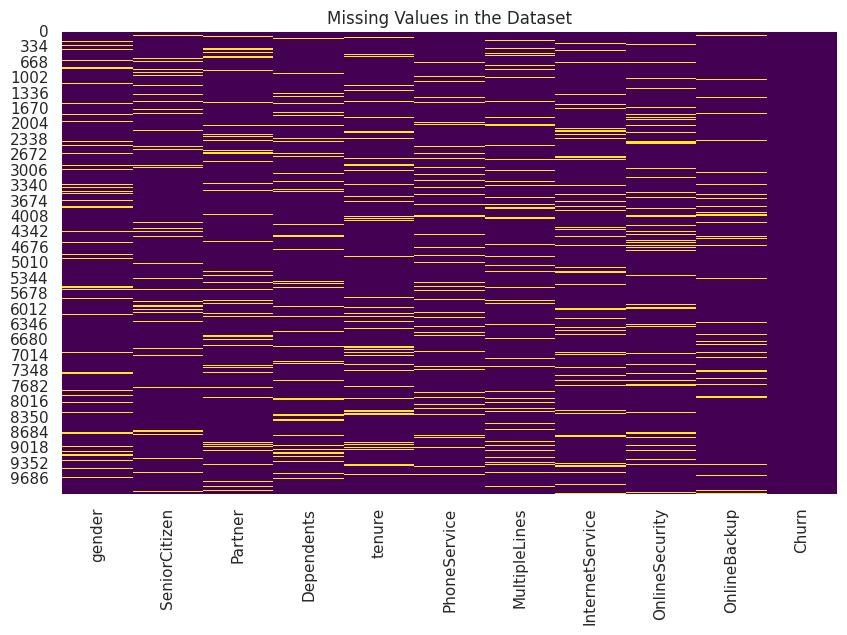

In [12]:
missing_values = dataset.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()


The above graph provides visibility of missing values across all features. there is hardly any pattern with bare analysis in missing values.

Handling Missing Values

Here are a few strategies to handle missing data:

For Numerical Data: You can use mean, median, or mode to fill in missing values.
For Categorical Data: You can use the mode (most frequent value) to fill in missing values or create a new category, e.g., "Unknown".

Here we have used

1. Median for numerical features

2. 'missing' for categorical features. did not mode as it further reduces the model performance as there is pattern in missing values too;

Missing Values in Each Column:
 gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
Churn              0
tenure_bin         0
dtype: int64


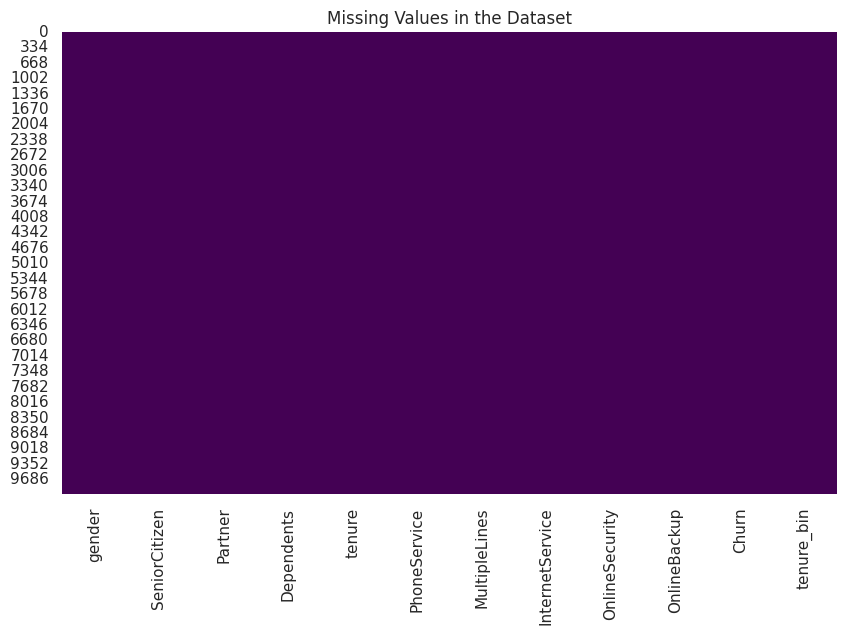

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'Churn', 'tenure_bin'],
      dtype='object')


In [13]:
# Handling missing values
dataset.fillna({
    'tenure': dataset['tenure'].mean(),
    'gender': 'missing',
    'SeniorCitizen': 'missing',
    'Partner': 'missing',
    'Dependents': 'missing',
    'PhoneService': 'missing',
    'MultipleLines': 'missing',
    'InternetService': 'missing',
    'OnlineSecurity': 'missing',
    'OnlineBackup': 'missing'
}, inplace=True)

# Binning tenure (numerical coloumn) into categories
bins = [-float('inf'), 12, 24, 48, 60, 72, float('inf')]
labels = ['0-12', '13-24', '25-48', '49-60', '61-72', '>72']
dataset['tenure_bin'] = pd.cut(dataset['tenure'], bins=bins, labels=labels, right=False)

# re-checking if missing values have been addressed following the above 'misssing' approach
missing_values = dataset.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Dataset')
plt.show()

print(dataset.columns)

The above graph proves that all the missing values across all features have been addressed including the binning category of tenure feature.

Handling Outliers

Outliers can distort statistical analyses. You can detect outliers using box plots or z-scores.

Outliers Detected:
 0


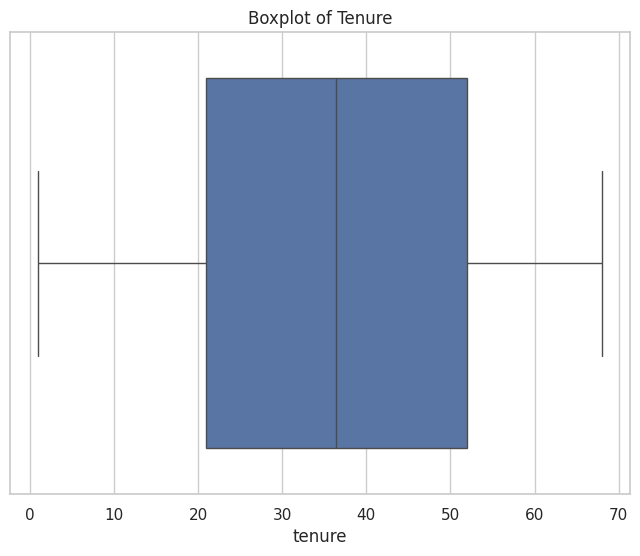

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'Churn', 'tenure_bin'],
      dtype='object')


In [14]:
# Detecting outliers using z-score
numeric_cols = ['tenure']
z_scores = np.abs(zscore(dataset[numeric_cols].dropna()))
outliers = np.where(z_scores > 3, True, False)
print("Outliers Detected:\n", outliers.sum())

percentile_95 = np.percentile(dataset['tenure'], 95)
dataset['tenure'] = np.where(dataset['tenure'] > percentile_95, percentile_95, dataset['tenure'])

# Visualizing outliers using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['tenure'])
plt.title('Boxplot of Tenure')
plt.show()

# Handling outliers: Removing or capping them
dataset = dataset[(z_scores < 3).all(axis=1)]

print(dataset.columns)


The above graph proves that there are no outliers in the data (in numerical column 'tenure')

Handling Skewed Data

Check the skewness of numerical features and apply transformations if needed:

Skewness of Tenure:
 -0.03265642885334885


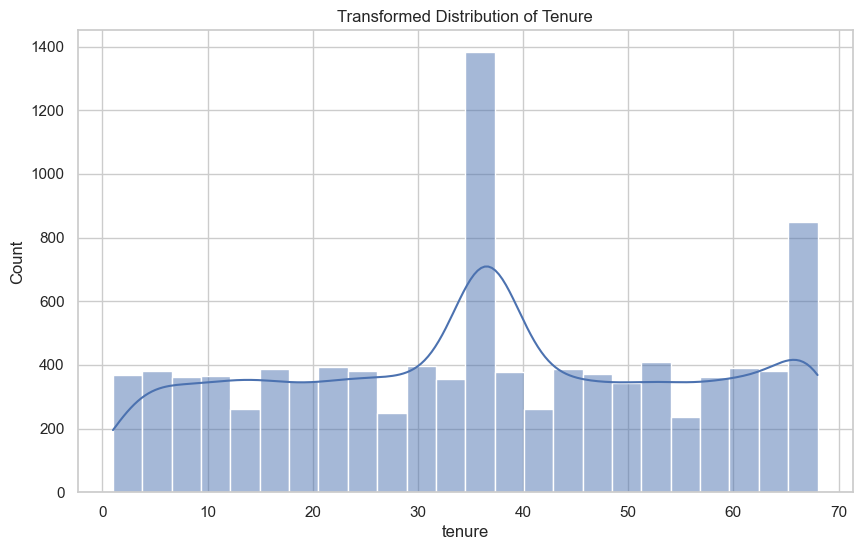

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'Churn', 'tenure_bin'],
      dtype='object')


In [ ]:
# Checking skewness
print("Skewness of Tenure:\n", dataset['tenure'].skew())

# If skewness > 0.5 or < -0.5, apply a transformation

if abs(dataset['tenure'].skew()) > 0.5:
    dataset['tenure'] = np.log1p(dataset['tenure'])

# Visualizing the transformed tenure distribution

plt.figure(figsize=(10, 6))
sns.histplot(dataset['tenure'], kde=True)
plt.title('Transformed Distribution of Tenure')
plt.show()

print(dataset.columns)


The above graph proves that there is no skewness in the data.

# 3.2 Feature Engineering

Feature Encoding

Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.

Feature Transformation (Standardization/Normalization)

Instead of normalisation/standardisation, we have used binning approach in the previous block of codes for the numerical feature as the scaling is not required since we have most of the cateogircal variables

In [15]:
# Convert all categorical columns to string type
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'tenure_bin']
dataset[categorical_features] = dataset[categorical_features].astype(str)

# Define preprocessing for numeric and categorical features
numeric_features = []

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Variance Threshold is set to identify features with low variance
variance_thresh = VarianceThreshold(threshold=0.01)

# PCA - Dimensionality reduction Technique
pca = PCA(n_components=0.95, random_state=42)

# Combine onehot encoding (i.e preprocessing), variance threshold, and PCA in a pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('variance_thresh', variance_thresh),
    ('pca', pca)
])


Summary of Pre-processing Steps

Missing Values: Filled missing values using median for numerical and 'missing' for categorical variables.

Outliers: Detected and handled outliers using z-score.

Skewed Data: Applied log transformation to address skewness however there are data skewness.

Feature Encoding: Converted categorical features to numerical using one-hot encoding.

Feature Transformation: Applied binning for numerical features and have used PCA for dimensionality reduction and variance analysis for low variant features to be removed.

# 4. Model Building

Step 1: Splitting the Dataset

Test size split is given as user input and therefore this will help with model iteration to track its performance

In [20]:
X = dataset.drop(columns=['Churn'])
y = dataset['Churn']

test_size = float(input("Enter the test size in decimals: "))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
print(f"Given input for test size is: {test_size}")

Enter the test size in decimals: .8
Given input for test size is: 0.8


Justification:

1. Collecting the test_size input from the user and let the model behave accordingly.

Step 2: Building and Tuning the Models

Decision Tree model building and hyperparameter tuning

In [21]:
# Transform the features by applying preprocessing pipeline.
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

# Apply SMOTE to the transformed training data to generate synthetic data to address the imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

preprocessed_features = preprocessing_pipeline.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out()

# Identify the low variance features that were removed
selected_features_mask = preprocessing_pipeline.named_steps['variance_thresh'].get_support()
low_variance_features = preprocessed_features[~selected_features_mask]

pca_components = preprocessing_pipeline.named_steps['pca'].components_

# Calculate the contribution of each original feature to the principal components
pca_loadings = pd.DataFrame(pca_components.T, index=preprocessed_features, columns=[f'PC{i+1}' for i in range(pca_components.shape[0])])

#Identify the top contributing preprocessed features for each Pricipal Component for dimensionality reduction
top_contributors = pd.DataFrame()
for i in range(pca_loadings.shape[1]):
    top_contributors = pd.concat([top_contributors, pca_loadings[f'PC{i+1}'].nlargest(3)])

top_contributors = top_contributors.drop_duplicates()
print("Top Contributing Features for each PCA:\n", top_contributors)

# Filter down to the most important features based on their contribution to the Principal Components used in the decision tree
selected_features = list(set(top_contributors.index.tolist()))

print(f"selected features: {len(selected_features)}")
for selected_feature in selected_features:
    print(selected_feature)

# Hyperparameter Tuning

tree_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, 15, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4, 5],
    'classifier__max_features': [None, 'sqrt', 'log2'],
    'classifier__class_weight': ['balanced', None]
}

tree_pipeline = Pipeline(steps=[
    ('classifier', DecisionTreeClassifier(random_state=42))
])

grid_search_tree = GridSearchCV(tree_pipeline, tree_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_tree.fit(X_train_res, y_train_res)


Top Contributing Features for each PCA:
                                            0
SeniorCitizen_1.0                   0.353781
gender_Female                       0.343875
Dependents_No                       0.335512
gender_Female                       0.515842
SeniorCitizen_0.0                   0.378455
...                                      ...
OnlineBackup_missing                0.334335
Dependents_missing                  0.270102
gender_missing                      0.566831
OnlineSecurity_No internet service  0.144942
Partner_missing                     0.134750

[72 rows x 1 columns]
selected features: 32
PhoneService_missing
PhoneService_Yes
Partner_missing
MultipleLines_No
OnlineSecurity_Yes
tenure_bin_49-60
MultipleLines_No phone service
OnlineBackup_No
OnlineBackup_missing
gender_missing
SeniorCitizen_0.0
Partner_No
tenure_bin_0-12
Dependents_Yes
Dependents_No
InternetService_DSL
InternetService_Fiber optic
tenure_bin_61-72
OnlineSecurity_No internet service
SeniorCiti

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced', None],
                         'classifier__max_depth': [3, 5, 7, 10, 15, 20, None],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4, 5],
                         'classifier__min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

The above result proves that

1. The input for test size is collected from the user's choice

2. PCA (Dimensionality Reduction Technique) addresses the correlation and reduces the features from 24 to 16

3. Top contributing features for Principal component is also shown as this highlights the important feature for model building

Logistic Regression Tree model building and hyperparameter tuning

In [ ]:
# Hyperparameter Tuning

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__class_weight': ['balanced', None]
}

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

grid_search_logistic_reg = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic_reg.fit(X, y)

# Final Model Evaluation
best_model_logistic = grid_search_logistic_reg.best_estimator_

# Apply the preprocessor to the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Apply SMOTE to the transformed training data within the pipeline
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_transformed, y_train)

Justification:

Cross-Validation:

Using cross-validation helps in selecting the best hyperparameters without overfitting. It ensures that the model's performance is consistent across different subsets of data.

PCA:

Dimensionality reduction technique is used address the feature co-relation by removing less impactful features

Hyperparameter Tuning:

Adjusting hyperparameters like regularization strength (C) for Logistic Regression and tree depth (max_depth) for Decision Tree helps in finding the optimal model complexity, balancing bias and variance.

# 5. Performance Evaluation

# Evaluate Model Performance

We use multiple evaluation metrics to compare the performance of both models.

5.1 Decision Tree Model Evaluation

Best Decision Tree Parameters: {'classifier__class_weight': 'balanced', 'classifier__max_depth': 3, 'classifier__max_features': None, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2}
Decision Tree ROC AUC: 0.5425080643144707
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.57      0.55       985
           1       0.55      0.51      0.53      1015

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000

Decision Tree Confusion Matrix:
 [[559 426]
 [493 522]]


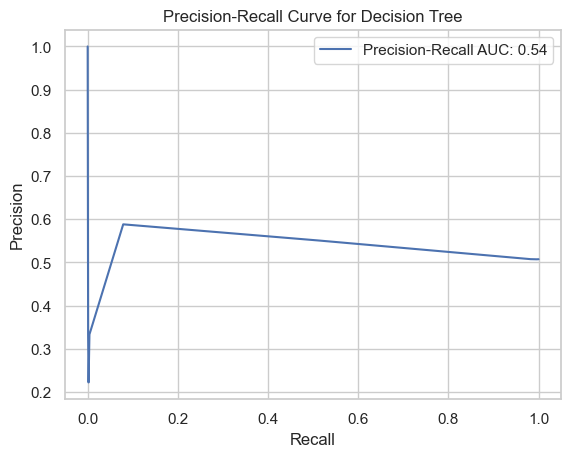

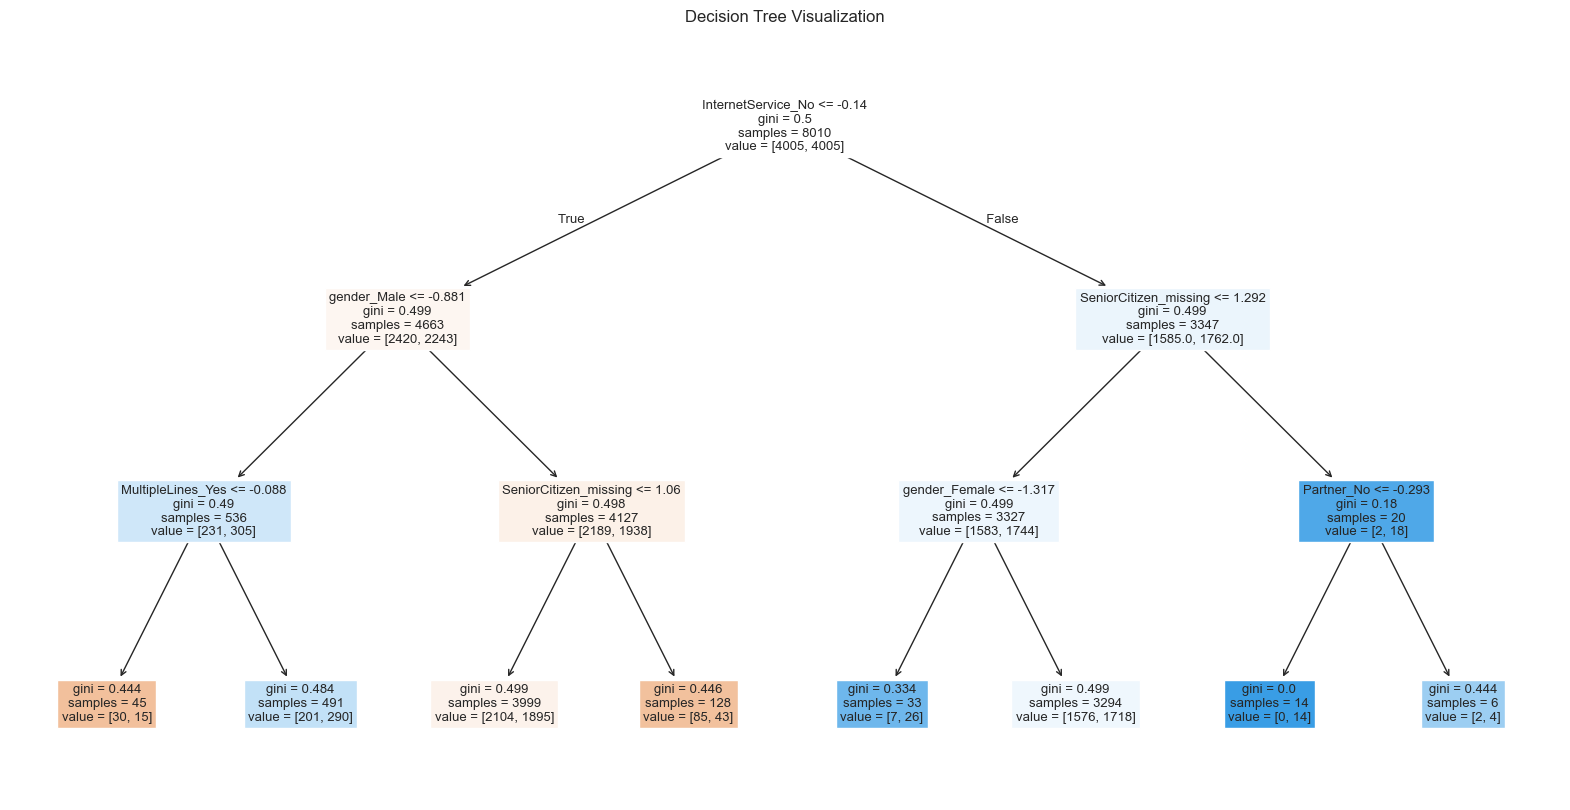

In [ ]:
# Decision Tree performance evaluation on the test set

best_tree_model = grid_search_tree.best_estimator_
y_pred_tree = best_tree_model.predict(X_test_transformed)
y_proba_tree = best_tree_model.predict_proba(X_test_transformed)[:, 1]

print("Best Decision Tree Parameters:", grid_search_tree.best_params_)
print("Decision Tree ROC AUC:", roc_auc_score(y_test, y_proba_tree))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

# Plot Precision-Recall Curve

precision_tree, recall_tree, _ = precision_recall_curve(y_test, y_proba_tree)
pr_auc_tree = auc(recall_tree, precision_tree)

plt.figure()
plt.plot(recall_tree, precision_tree, label=f'Precision-Recall AUC: {pr_auc_tree:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Decision Tree')
plt.legend(loc='best')
plt.show()

# Plot Impurity and Feature Importances for Decision Tree

plt.figure(figsize=(20,10))
plot_tree(best_tree_model.named_steps['classifier'], feature_names=preprocessed_features, filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# Feature Importances for Decision Tree
importances = best_tree_model.named_steps['classifier'].feature_importances_
indices = np.argsort(importances)[::-1]

# Filter out features that were removed by VarianceThreshold
selected_features_mask = variance_thresh.get_support()
all_feature_names = np.array(preprocessed_features)
selected_feature_names = all_feature_names[selected_features_mask]

# Align importances with features
filtered_importances = importances[:len(selected_feature_names)]


The above impurity graph proves that

1. Internet Service No feature is holding less impurity compare to other features. gini index is 0.5

2. In the depth1, there are two equal gini index features that are gender_male & servicing_citizen_missing

3. the tree gets to depth 3 with the branching factor being 2.

5.2 Logistic Regression Model Evaluation

Best Logistic Regression Parameters: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Logistic Regression ROC AUC: 0.5605541246780525
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.54      0.54       985
           1       0.55      0.55      0.55      1015

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000

Logistic Regression Confusion Matrix:
 [[531 454]
 [461 554]]


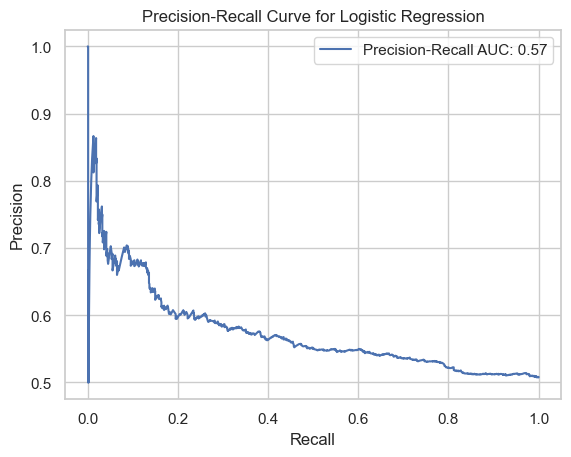

In [ ]:
# Logistic regression performance evaluation on the test set

y_pred = best_model_logistic.predict(X_test)
y_proba = best_model_logistic.predict_proba(X_test)[:, 1]

print("Best Logistic Regression Parameters:", grid_search_logistic_reg.best_params_)
print("Logistic Regression ROC AUC:", roc_auc_score(y_test, y_proba))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot Precision-Recall Curve for Logistic Regression
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall AUC: {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='best')
plt.show()

# Feature Importances for Logistic Regression
coef = best_model_logistic.named_steps['classifier'].coef_.ravel()
feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out()

# Ensure feature names and coefficients match
sorted_indices_lr = np.argsort(np.abs(coef))[::-1]
selected_feature_names_lr = np.array(feature_names)[sorted_indices_lr]
selected_coefficients_lr = coef[sorted_indices_lr]

# 2. Insights and Model Comparison

Logistic Regression:


ROC AUC: Indicates how well the model distinguishes between classes. Higher values indicate better performance. Logistic regression is at ~0.567

Accuracy: Proportion of correctly predicted instances out of the total instances. Logistic Regression is at 0.54

Precision-Recall AUC: Highlights the trade-off between precision and recall. Useful when classes are imbalanced. Logistic regression is at ~0.57

Confusion Matrix: Provides insight into true positives, false positives, true negatives, and false negatives.

Logistic Regression Confusion Matrix:
 [[531 454]
 [461 554]]


Decision Tree:


ROC AUC: May perform well if the tree captures the underlying structure of the data. Decision Tree is at ~0.567

Accuracy: Dependent on how well the tree generalizes to unseen data. Decision Tree is at 0.54

Precision-Recall AUC: May fluctuate depending on the tree's complexity. Decision Tree is at ~0.54

Confusion Matrix: Useful for understanding where the model might be making more errors.

Decision Tree Confusion Matrix:
 [[559 426]
 [493 522]]



# 3. Conclusion

Compare the metrics across both models:

1. As Logistic Regression shows a higher ROC AUC and Precision-Recall AUC, it suggests that it's better at distinguishing between classes and handling trade-offs between precision and recall.

2. Logistic Regression have more balanced precision-recall performance. This shows the model's ability to generalize well (comparatively).

3. Dataset does not have generate much of relevance to the target variable even when we apply feature interactions and feature engineering

4. will try to use the polynomial relationship to see if the model performance can be improved further.
